In [53]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR


In [54]:
weather01 = pd.read_csv('IndianWeatherRepository 1.csv')
weather01.tail()
len(weather01['location_name'].unique())


552

In [55]:
columns_to_drop =['air_quality_gb-defra-index','country','latitude','longitude','air_quality_us-epa-index','timezone','condition_text','air_quality_Sulphur_dioxide','air_quality_PM2.5','last_updated_epoch','moon_phase','moon_illumination','wind_mph','wind_degree','wind_direction','pressure_mb','precip_in','feels_like_fahrenheit','visibility_miles','uv_index','gust_mph','gust_kph','temperature_fahrenheit','cloud','visibility_km','air_quality_PM10','sunrise','sunset','moonrise','moonset','air_quality_Ozone','air_quality_Carbon_Monoxide']
weather01 = weather01.drop(columns_to_drop, axis=1)
weather01.head()


,location_name,region,last_updated,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide
0,Ashoknagar,Madhya Pradesh,2023-08-29 10:45,27.5,20.5,29.77,0.0,67,29.7,1.7
1,Raisen,Madhya Pradesh,2023-08-29 10:45,27.5,15.5,29.78,0.0,70,30.0,2.1
2,Chhindwara,Madhya Pradesh,2023-08-29 10:45,26.3,18.4,29.78,0.0,70,28.2,0.6
3,Betul,Madhya Pradesh,2023-08-29 10:45,25.6,16.9,29.80,0.0,76,27.6,1.2
4,Hoshangabad,Madhya Pradesh,2023-08-29 10:45,27.2,16.2,29.79,0.0,74,29.9,2.2


In [56]:
first_row = weather01.iloc[0]
print(first_row)

location_name                         Ashoknagar
region                            Madhya Pradesh
last_updated                    2023-08-29 10:45
temperature_celsius                         27.5
wind_kph                                    20.5
pressure_in                                29.77
precip_mm                                    0.0
humidity                                      67
feels_like_celsius                          29.7
air_quality_Nitrogen_dioxide                 1.7
Name: 0, dtype: object


In [57]:
#renaming our columns
weather01 = weather01.rename(columns={'location_name':'location','last_updated':'date','condition_text':'cloud_cover'})
weather01.shape

(109536, 10)

In [58]:
# Converting 'date' column to datetime format
weather01['date_time'] = pd.to_datetime(weather01['date'], format='%Y-%m-%d %H:%M')
weather01.head()


,location,region,date,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide,date_time
0,Ashoknagar,Madhya Pradesh,2023-08-29 10:45,27.5,20.5,29.77,0.0,67,29.7,1.7,2023-08-29 10:45:00
1,Raisen,Madhya Pradesh,2023-08-29 10:45,27.5,15.5,29.78,0.0,70,30.0,2.1,2023-08-29 10:45:00
2,Chhindwara,Madhya Pradesh,2023-08-29 10:45,26.3,18.4,29.78,0.0,70,28.2,0.6,2023-08-29 10:45:00
3,Betul,Madhya Pradesh,2023-08-29 10:45,25.6,16.9,29.80,0.0,76,27.6,1.2,2023-08-29 10:45:00
4,Hoshangabad,Madhya Pradesh,2023-08-29 10:45,27.2,16.2,29.79,0.0,74,29.9,2.2,2023-08-29 10:45:00


In [59]:
#Now we will calculate Temporal aggregation which we will use further 
# Calculate daily average temperature, humidity, and total precipitation
daily_aggregated_data = weather01.resample('D', on='date_time').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'precip_mm': 'sum'
})

print("Daily Aggregated Data:")
print(daily_aggregated_data.head())

Daily Aggregated Data:
            temperature_celsius   humidity  precip_mm
date_time                                            
2023-08-29            29.666667  59.926335       27.1
2023-08-30            28.246909  65.676364       26.2
2023-08-31            24.940182  76.690909      122.4
2023-09-01            25.379779  76.154412      206.0
2023-09-02            25.628780  75.327869      268.4


In [60]:
weather01=weather01.drop('date',axis=1)


In [61]:
grouped_data = weather01.groupby(['location'])

derived_group_name = None

city_name= input('enter city name:')

derived_group_name = city_name
City = grouped_data.get_group(derived_group_name)
City

,location,region,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide,date_time
14,Satna,Madhya Pradesh,30.1,18.0,29.72,0.0,58,33.1,1.0,2023-08-29 10:45:00
557,Satna,Madhya Pradesh,28.4,16.9,29.76,0.0,65,31.0,2.8,2023-08-30 08:45:00
1107,Satna,Madhya Pradesh,26.6,9.0,29.72,0.0,67,28.3,3.0,2023-08-31 05:15:00
1657,Satna,Madhya Pradesh,27.4,10.1,29.71,0.0,64,29.2,3.2,2023-09-01 05:15:00
2201,Satna,Madhya Pradesh,27.8,8.6,29.69,0.0,63,29.8,2.7,2023-09-02 05:15:00
...,...,...,...,...,...,...,...,...,...,...
106810,Satna,Madhya Pradesh,24.0,10.8,29.90,0.0,21,23.4,5.6,2024-03-15 22:00:00
107353,Satna,Madhya Pradesh,23.8,14.0,29.96,0.0,14,23.1,5.9,2024-03-16 22:00:00
107903,Satna,Madhya Pradesh,26.2,6.8,29.91,0.0,18,24.6,8.8,2024-03-17 22:15:00
108454,Satna,Madhya Pradesh,24.7,9.4,29.88,0.0,16,23.6,12.2,2024-03-18 22:00:00


In [62]:
import plotly.express as px
fig = px.line(City, x='date_time', y='temperature_celsius')
fig.show()


c:\Users\shree\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [63]:
City = City.set_index('date_time')
City.describe()

,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,19.252000,6.179500,29.912350,0.030050,53.090000,19.792000,11.951000
std,4.831939,2.698823,0.150967,0.145065,20.711997,5.544442,6.873502
min,10.000000,3.600000,29.490000,0.000000,11.000000,9.800000,1.000000
25%,15.200000,4.000000,29.860000,0.000000,39.750000,15.300000,7.500000
50%,19.500000,5.400000,29.950000,0.000000,49.500000,19.500000,10.500000
75%,23.825000,7.675000,30.020000,0.000000,65.000000,24.600000,14.900000
max,30.100000,18.000000,30.150000,1.130000,96.000000,33.100000,39.100000


In [64]:
# Now we will perform 'Moving Averages' for short term fluctuation in the dataset
# Calculate 7-day moving average of temperature
City['temperature_7day_ma'] = City['temperature_celsius'].rolling(window=7).mean()
City['humidity_7day_ma'] = City['humidity'].rolling(window=7).mean()
City['wind_speed_7day_ma'] = City['wind_kph'].rolling(window=7).mean()
print("weather01 Data with Moving Averages:")
print(City[[ 'temperature_celsius', 'temperature_7day_ma','humidity','humidity_7day_ma','wind_kph','wind_speed_7day_ma']])
#Remember these are new columns in our dataset

weather01 Data with Moving Averages:
                     temperature_celsius  temperature_7day_ma  humidity  \
date_time                                                                 
2023-08-29 10:45:00                 30.1                  NaN        58   
2023-08-30 08:45:00                 28.4                  NaN        65   
2023-08-31 05:15:00                 26.6                  NaN        67   
2023-09-01 05:15:00                 27.4                  NaN        64   
2023-09-02 05:15:00                 27.8                  NaN        63   
...                                  ...                  ...       ...   
2024-03-15 22:00:00                 24.0            23.942857        21   
2024-03-16 22:00:00                 23.8            24.314286        14   
2024-03-17 22:15:00                 26.2            24.771429        18   
2024-03-18 22:00:00                 24.7            24.800000        16   
2024-03-19 21:45:00                 25.0            24.814286  

In [87]:
#  SVM model training 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

City.dropna(inplace=True)
City.shape


,location,region,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide,temperature_7day_ma,humidity_7day_ma,wind_speed_7day_ma
date_time,,,,,,,,,,,,
2023-09-04 05:00:00,Satna,Madhya Pradesh,26.6,6.5,29.60,0.0,59,27.8,4.1,27.771429,62.000000,10.800000
2023-09-05 05:00:00,Satna,Madhya Pradesh,26.0,7.2,29.57,0.8,80,28.5,5.7,27.185714,65.142857,9.257143
2023-09-06 04:45:00,Satna,Madhya Pradesh,25.2,11.9,29.59,0.8,89,28.1,4.1,26.728571,68.571429,8.542857
2023-09-07 04:30:00,Satna,Madhya Pradesh,26.1,7.9,29.60,0.7,85,29.2,10.5,26.657143,71.142857,8.385714
2023-09-08 04:30:00,Satna,Madhya Pradesh,25.1,8.6,29.57,0.0,91,28.0,3.8,26.328571,75.000000,8.171429
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15 22:00:00,Satna,Madhya Pradesh,24.0,10.8,29.90,0.0,21,23.4,5.6,23.942857,23.000000,8.428571
2024-03-16 22:00:00,Satna,Madhya Pradesh,23.8,14.0,29.96,0.0,14,23.1,5.9,24.314286,21.428571,8.785714
2024-03-17 22:15:00,Satna,Madhya Pradesh,26.2,6.8,29.91,0.0,18,24.6,8.8,24.771429,20.428571,8.314286


In [66]:
# selecting the independent feature i.e., features in which the ML model will be trained 
independent_feature= ['wind_kph','pressure_in','precip_mm','humidity','air_quality_Nitrogen_dioxide','feels_like_celsius'] 
# selecting the targeted feature i.e., features that will be predicted based on their respective value in independent feature
targeted_feature= ['temperature_celsius']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(City[independent_feature],City[targeted_feature],test_size=0.3,random_state=3)
X_train.shape, X_test.shape

((135, 6), (59, 6))

In [94]:
X_train

,wind_kph,pressure_in,precip_mm,humidity,air_quality_Nitrogen_dioxide,feels_like_celsius
date_time,,,,,,
2023-12-20 01:00:00,4.0,30.10,0.00,41,12.0,12.7
2024-03-03 22:45:00,6.5,29.87,0.01,64,3.2,20.8
2023-09-09 04:15:00,8.3,29.57,0.00,96,20.1,27.7
2024-01-06 23:30:00,5.4,30.06,0.00,80,8.7,15.3
2024-01-11 23:30:00,3.6,30.05,0.00,42,18.3,12.6
...,...,...,...,...,...,...
2023-09-04 05:00:00,6.5,29.60,0.00,59,4.1,27.8
2024-03-10 22:30:00,10.1,29.97,0.00,25,7.9,23.2
2024-01-17 23:15:00,6.5,29.97,0.00,41,12.7,11.8


In [68]:
'''from sklearn.model_selection import GridSearchCV
 
param_grid = {
    'C': [0.1, 1, 10],  # Reduced range
    'epsilon': [0.1, 0.5, 1.0],  # Reduced range
    'kernel': ['linear', 'rbf'],  # Fewer options
    'gamma': ['scale', 'auto']  # Fewer options
}

# Initialize GridSearchCV with the SVR model and the parameter grid
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Initialize GridSearchCV with the SVR model and the parameter grid
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters: ", best_params)
print("Best Model: ", best_model)
'''



'from sklearn.model_selection import GridSearchCV\n \nparam_grid = {\n    \'C\': [0.1, 1, 10],  # Reduced range\n    \'epsilon\': [0.1, 0.5, 1.0],  # Reduced range\n    \'kernel\': [\'linear\', \'rbf\'],  # Fewer options\n    \'gamma\': [\'scale\', \'auto\']  # Fewer options\n}\n\n# Initialize GridSearchCV with the SVR model and the parameter grid\ngrid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring=\'neg_mean_squared_error\', verbose=2, n_jobs=-1)\n\n# Initialize GridSearchCV with the SVR model and the parameter grid\ngrid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring=\'neg_mean_squared_error\', verbose=2, n_jobs=-1)\n\n# Fit GridSearchCV to the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and the best model\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n\nprint("Best Parameters: ", best_params)\nprint("Best Model: ", best_model)\n'

In [79]:
# creating the svr model with approprieate hyperparameter tuning techniques
svr=SVR(C=1, epsilon=0.5, kernel='linear')
# training the model
svr.fit(X_train, y_train)


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1, epsilon=0.5, kernel='linear')

In [95]:

new_data = np.array([[8.3,29.75,0.00,61,9.6,25.4]]) 
# Predict the temperature for the new data
predicted_temperature = svr.predict(new_data)
# Print the predicted temperature
print(f"Predicted temperature: {predicted_temperature[0]:.4f} degrees Celsius")


Predicted temperature: 24.2408 degrees Celsius


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



In [81]:
X_test

,wind_kph,pressure_in,precip_mm,humidity,air_quality_Nitrogen_dioxide,feels_like_celsius
date_time,,,,,,
2023-10-08 02:30:00,8.3,29.75,0.00,61,9.6,25.4
2023-09-29 04:00:00,3.6,29.69,0.00,69,15.6,27.6
2023-09-18 04:15:00,10.8,29.64,0.00,87,5.9,26.1
2023-11-29 01:15:00,6.1,29.95,0.00,92,10.4,15.7
2023-12-27 00:30:00,3.6,30.08,0.00,51,14.9,15.6
2024-01-25 22:45:00,6.8,30.14,0.00,42,15.3,11.9
2024-01-26 23:30:00,5.4,30.15,0.00,42,14.4,12.4
2023-11-20 01:15:00,3.6,29.99,0.00,66,11.1,19.4
2023-09-16 04:00:00,9.0,29.60,0.00,94,5.7,26.3


In [96]:
y_pred = svr.predict(X_test)
y_pred=pd.DataFrame(y_pred)

y_pred.columns = ['Predicted Value'] 
y_pred

,Predicted Value
0,24.240809
1,25.794575
2,24.355424
3,14.817557
4,15.581808
5,12.605357
6,12.994425
7,18.662409
8,24.237924
9,26.784995


In [83]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred)

df1.index = y_test.index  
df2.index = df1.index  
difference = pd.DataFrame({'difference': df1.iloc[:, 0] - df2.iloc[:, 0]})
merged_df = pd.concat([df1, df2, difference], axis=1)
merged_df

,temperature_celsius,Predicted Value,difference
date_time,,,
2023-10-08 02:30:00,23.9,24.240809,-0.340809
2023-09-29 04:00:00,25.9,25.794575,0.105425
2023-09-18 04:15:00,23.9,24.355424,-0.455424
2023-11-29 01:15:00,15.7,14.817557,0.882443
2023-12-27 00:30:00,14.7,15.581808,-0.881808
2024-01-25 22:45:00,12.3,12.605357,-0.305357
2024-01-26 23:30:00,12.4,12.994425,-0.594425
2023-11-20 01:15:00,19.4,18.662409,0.737591
2023-09-16 04:00:00,23.8,24.237924,-0.437924


In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_test,y_pred)

0.984843118944072

In [86]:
from sklearn.metrics import mean_squared_error

def mse(y_test, y_pred):
  return mean_squared_error(y_test, y_pred)
mse(y_test,y_pred)


0.3387897752010594

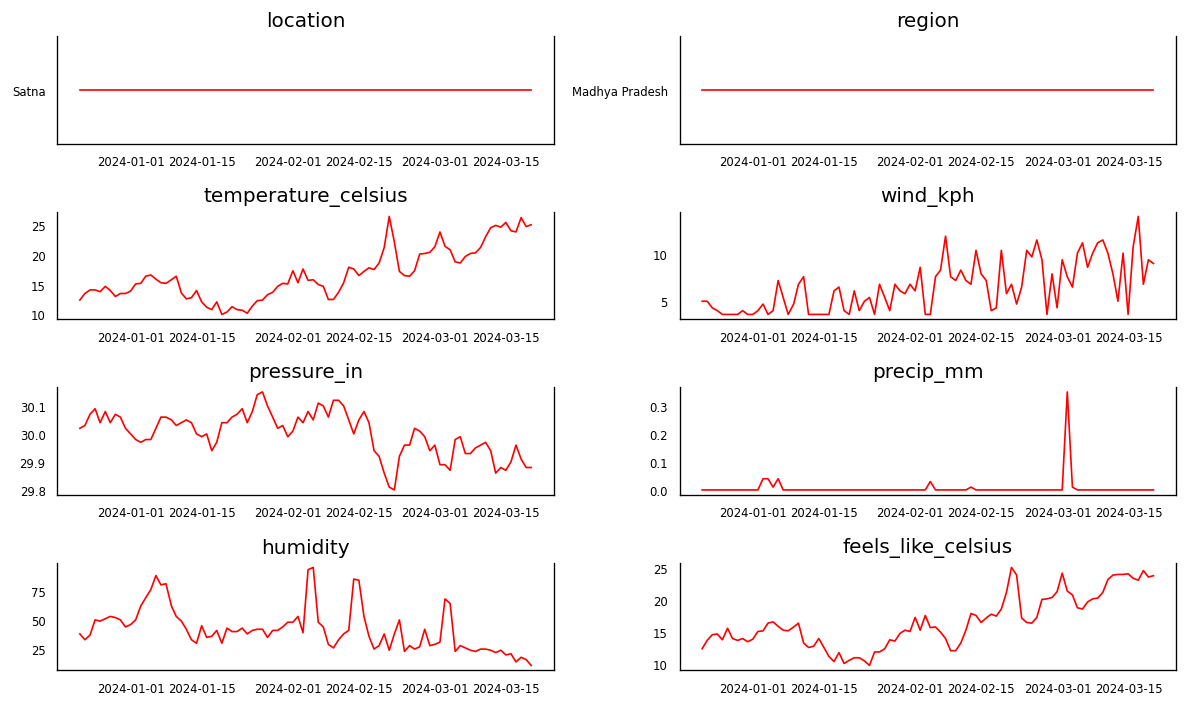

In [77]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = City[City.columns[i]]['2023-12-22 00:15:00':'2024-03-19 21:45:00']
    ax.plot(data, color='red', linewidth=1)

    ax.set_title(City.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=7)
plt.tight_layout()


In [78]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(svr, files)
